Part A

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

Part 1: Data Preprocessing

In [2]:
import datasets
from transformers import AutoTokenizer
# Instead of sklearn's train_test_split, use Dataset.train_test_split
from datasets import DatasetDict

# Load dataset
dataset = datasets.load_dataset("ccdv/arxiv-summarization")

# Select subset of 5000 samples
subset = dataset['train'].select(range(5000))

# Split data into train (80%), validation (10%), test (10%)
# Use DatasetDict.train_test_split for Hugging Face Datasets
split_dataset = subset.train_test_split(test_size=0.2, seed=42)
train_data = split_dataset['train']
val_data = split_dataset['test'].train_test_split(test_size=0.5, seed=42)['train'] # Further split test into validation and test
test_data = split_dataset['test'].train_test_split(test_size=0.5, seed=42)['test']

# Initialize tokenizer
model_name = "sshleifer/distilbart-cnn-12-6"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenization function
def tokenize_function(examples):
    model_inputs = tokenizer(examples["article"], max_length=1024, padding='max_length', truncation=True) # Added padding='max_length'
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples["abstract"], max_length=128, padding='max_length', truncation=True) # Added padding='max_length'
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Tokenize datasets
tokenized_train = train_data.map(tokenize_function, batched=True)
tokenized_val = val_data.map(tokenize_function, batched=True)
tokenized_test = test_data.map(tokenize_function, batched=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/3.96k [00:00<?, ?B/s]

train-00000-of-00015.parquet:   0%|          | 0.00/230M [00:00<?, ?B/s]

train-00001-of-00015.parquet:   0%|          | 0.00/228M [00:00<?, ?B/s]

train-00002-of-00015.parquet:   0%|          | 0.00/228M [00:00<?, ?B/s]

train-00003-of-00015.parquet:   0%|          | 0.00/227M [00:00<?, ?B/s]

train-00004-of-00015.parquet:   0%|          | 0.00/226M [00:00<?, ?B/s]

train-00005-of-00015.parquet:   0%|          | 0.00/227M [00:00<?, ?B/s]

train-00006-of-00015.parquet:   0%|          | 0.00/229M [00:00<?, ?B/s]

train-00007-of-00015.parquet:   0%|          | 0.00/230M [00:00<?, ?B/s]

train-00008-of-00015.parquet:   0%|          | 0.00/230M [00:00<?, ?B/s]

train-00009-of-00015.parquet:   0%|          | 0.00/228M [00:00<?, ?B/s]

train-00010-of-00015.parquet:   0%|          | 0.00/229M [00:00<?, ?B/s]

train-00011-of-00015.parquet:   0%|          | 0.00/231M [00:00<?, ?B/s]

train-00012-of-00015.parquet:   0%|          | 0.00/230M [00:00<?, ?B/s]

train-00013-of-00015.parquet:   0%|          | 0.00/230M [00:00<?, ?B/s]

train-00014-of-00015.parquet:   0%|          | 0.00/235M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/105M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/105M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/203037 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/6436 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/6440 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3980: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Part 2: LoRA-Based Fine-Tuning

In [3]:
from transformers import AutoModelForSeq2SeqLM
from peft import LoraConfig, get_peft_model, TaskType
import torch
from transformers import Trainer, TrainingArguments

# Load model
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Define LoRA config
peft_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,
    r=8,
    lora_alpha=16,
    lora_dropout=0.1,
    target_modules=["q_proj", "v_proj"]
)

# Apply LoRA to model
model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=3e-4,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=4,
    weight_decay=0.01,
    save_total_limit=3,
    fp16=torch.cuda.is_available(),
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
)

# Train
trainer.train()

# Save model
model.save_pretrained("fine-tuned-lora-model")
tokenizer.save_pretrained("fine-tuned-lora-model")

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

trainable params: 786,432 || all params: 306,296,832 || trainable%: 0.2568


model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

No label_names provided for model class `PeftModelForSeq2SeqLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: fastprojectcollab (fastprojectcollab-fast-nuces) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,2.985200,2.766599
2,2.904200,2.700882
3,2.837300,2.677192
4,2.800600,2.670274


('fine-tuned-lora-model/tokenizer_config.json',
 'fine-tuned-lora-model/special_tokens_map.json',
 'fine-tuned-lora-model/vocab.json',
 'fine-tuned-lora-model/merges.txt',
 'fine-tuned-lora-model/added_tokens.json',
 'fine-tuned-lora-model/tokenizer.json')

Part 3: Inference and Output

In [5]:
import pandas as pd
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch

# Load models and tokenizer
model_name = "sshleifer/distilbart-cnn-12-6"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load base model
base_model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to("cuda")

# Load fine-tuned model
from peft import PeftModel
ft_model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to("cuda")
ft_model = PeftModel.from_pretrained(ft_model, "fine-tuned-lora-model")
ft_model = ft_model.merge_and_unload()  # Merge LoRA adapters

# Generation function
def generate_summary(model, tokenizer, text, max_length=128):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=1024).to("cuda")
    summary_ids = model.generate(
        inputs["input_ids"],
        max_length=max_length,
        min_length=30,
        num_beams=4,
        early_stopping=True
    )
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Select 10 samples from test set
test_samples = tokenized_test.select(range(10))

# Generate summaries
results = []
for i, sample in enumerate(test_samples):
    article = tokenizer.decode(sample["input_ids"], skip_special_tokens=True)
    abstract = tokenizer.decode(sample["labels"], skip_special_tokens=True)

    # Base model summary
    base_summary = generate_summary(base_model, tokenizer, article)

    # Fine-tuned model summary
    ft_summary = generate_summary(ft_model, tokenizer, article)

    results.append({
        "id": i,
        "article": article[:200] + "...",  # Truncate for display
        "ground_truth": abstract,
        "base_model_summary": base_summary,
        "fine_tuned_summary": ft_summary
    })

# Save to DataFrame and CSV
df = pd.DataFrame(results)
df.to_csv("summary_comparisons.csv", index=False)

Part 4A: Automatic Evaluation (Quantitative)

In [7]:
!pip install rouge-score # Install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=20396e23cd37d5f8020f578ee6addace55007c9400405b473ea4caf6af23d32d
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [9]:
!pip install bert-score # Install the bert-score package

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your sessi

model.safetensors:  72%|#######2  | 1.03G/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initia

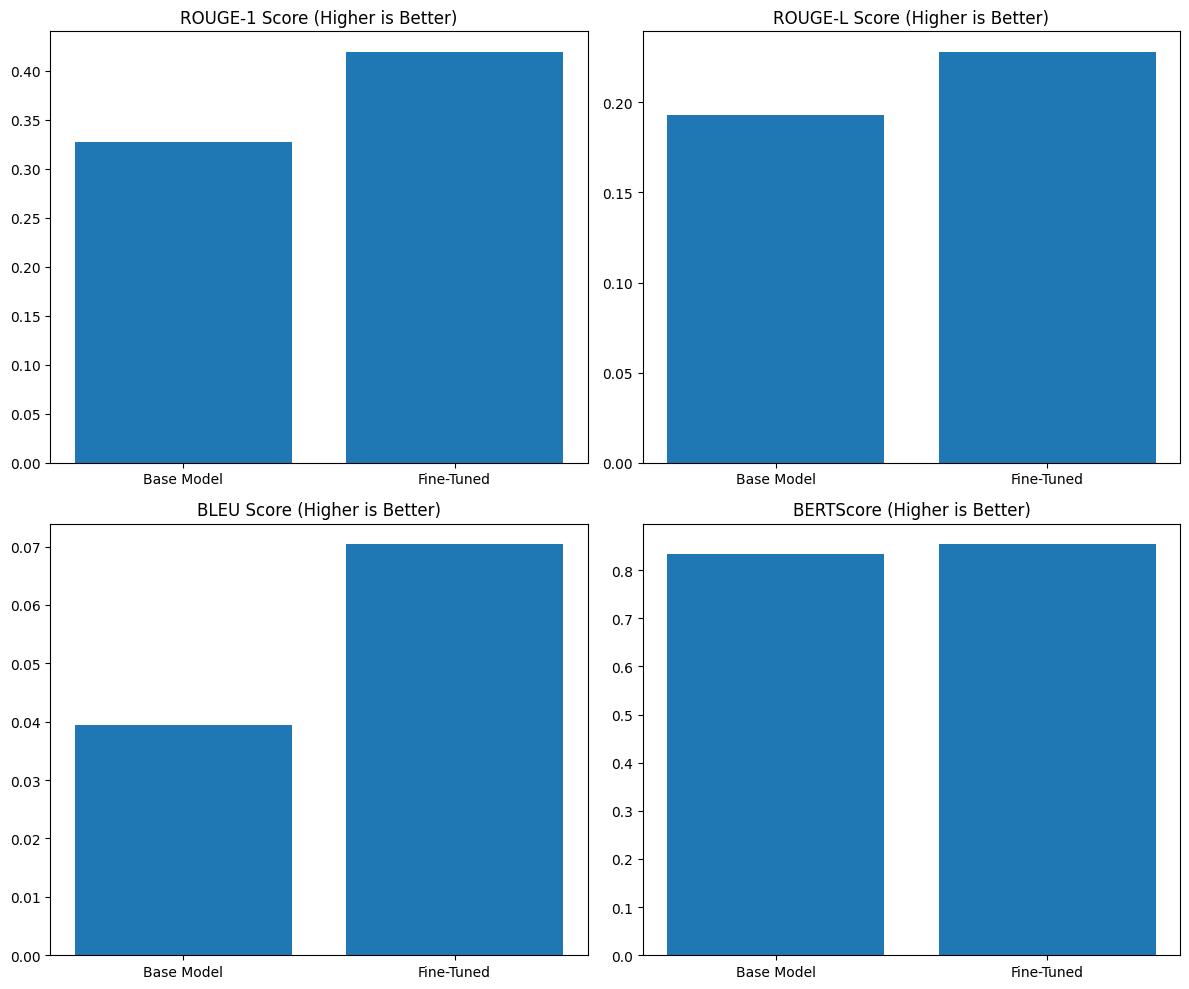

Automatic evaluation completed! Results saved to evaluation_metrics.csv and evaluation_metrics.png


In [1]:
import pandas as pd
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu
from bert_score import score as bert_score
import matplotlib.pyplot as plt
import numpy as np

# Load the summary comparisons CSV from Part 3
df = pd.read_csv("summary_comparisons.csv")

# Initialize ROUGE scorer
rouge = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

# Compute ROUGE, BLEU, and BERTScore for each summary
metrics = []
for _, row in df.iterrows():
    ground_truth = row['ground_truth']
    base_summary = row['base_model_summary']
    ft_summary = row['fine_tuned_summary']

    # ROUGE Scores
    rouge_base = rouge.score(ground_truth, base_summary)
    rouge_ft = rouge.score(ground_truth, ft_summary)

    # BLEU Scores (tokenize first)
    ref_tokens = ground_truth.split()
    base_tokens = base_summary.split()
    ft_tokens = ft_summary.split()

    bleu_base = sentence_bleu([ref_tokens], base_tokens)
    bleu_ft = sentence_bleu([ref_tokens], ft_tokens)

    # BERTScore (semantic similarity)
    P_base, R_base, F1_base = bert_score([base_summary], [ground_truth], lang='en')
    P_ft, R_ft, F1_ft = bert_score([ft_summary], [ground_truth], lang='en')

    metrics.append({
        'id': row['id'],
        'rouge1_base': rouge_base['rouge1'].fmeasure,
        'rougeL_base': rouge_base['rougeL'].fmeasure,
        'rouge1_ft': rouge_ft['rouge1'].fmeasure,
        'rougeL_ft': rouge_ft['rougeL'].fmeasure,
        'bleu_base': bleu_base,
        'bleu_ft': bleu_ft,
        'bertscore_base': F1_base.mean().item(),
        'bertscore_ft': F1_ft.mean().item()
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)

# Calculate average scores
avg_metrics = metrics_df.mean().to_dict()

# Visualize Results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# ROUGE-1
axes[0,0].bar(['Base Model', 'Fine-Tuned'], [avg_metrics['rouge1_base'], avg_metrics['rouge1_ft']])
axes[0,0].set_title('ROUGE-1 Score (Higher is Better)')

# ROUGE-L
axes[0,1].bar(['Base Model', 'Fine-Tuned'], [avg_metrics['rougeL_base'], avg_metrics['rougeL_ft']])
axes[0,1].set_title('ROUGE-L Score (Higher is Better)')

# BLEU
axes[1,0].bar(['Base Model', 'Fine-Tuned'], [avg_metrics['bleu_base'], avg_metrics['bleu_ft']])
axes[1,0].set_title('BLEU Score (Higher is Better)')

# BERTScore
axes[1,1].bar(['Base Model', 'Fine-Tuned'], [avg_metrics['bertscore_base'], avg_metrics['bertscore_ft']])
axes[1,1].set_title('BERTScore (Higher is Better)')

plt.tight_layout()
plt.savefig('evaluation_metrics.png')
plt.show()

# Save metrics to CSV
metrics_df.to_csv('evaluation_metrics.csv', index=False)
print("Automatic evaluation completed! Results saved to evaluation_metrics.csv and evaluation_metrics.png")

Part 4B: LLM-as-a-Judge Evaluation (Qualitative)

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


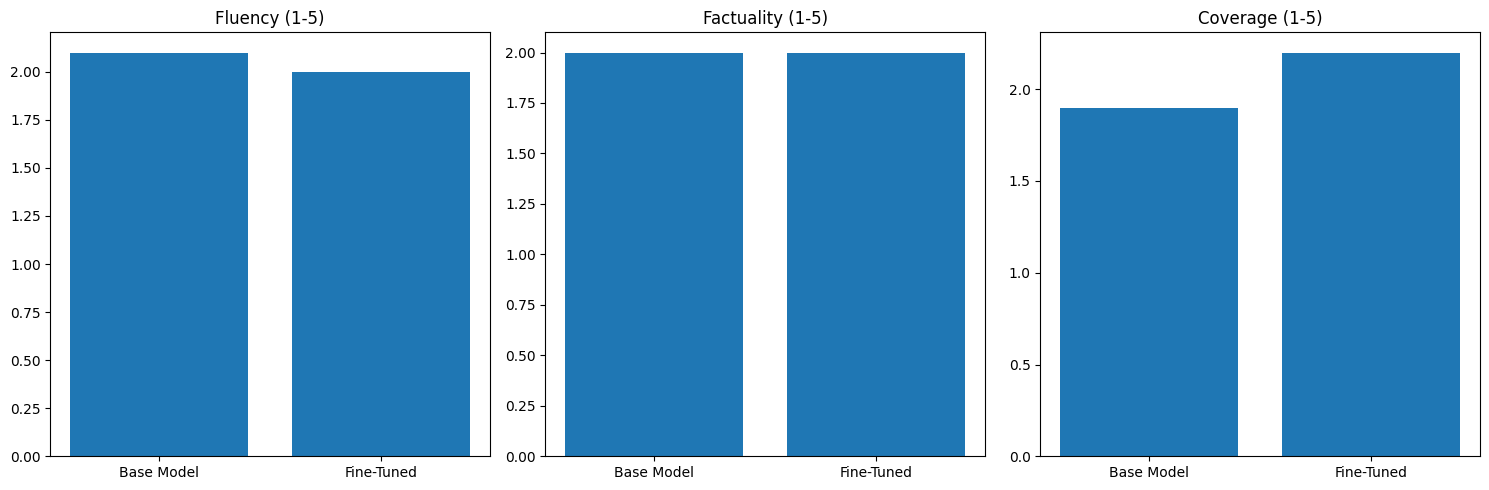

LLM-as-a-Judge evaluation completed! Results saved to llm_judge_scores.csv and llm_judge_scores.png


In [2]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt

# Load the summary comparisons CSV
df = pd.read_csv("summary_comparisons.csv")

# Initialize a smaller local LLM for evaluation (Zero-shot classification)
eval_model = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define evaluation criteria
criteria = ["fluency", "factuality", "coverage"]

def evaluate_summary(article, summary):
    # Fluency evaluation (grammar, readability)
    fluency_result = eval_model(
        summary,
        candidate_labels=["1 (Poor)", "2 (Fair)", "3 (Good)", "4 (Very Good)", "5 (Excellent)"],
        hypothesis_template="This summary is {} in terms of fluency."
    )
    fluency_score = int(fluency_result['labels'][0][0])  # Extract score (1-5)

    # Factuality evaluation (accuracy vs. source)
    factuality_result = eval_model(
        f"Article: {article[:500]}\nSummary: {summary}",
        candidate_labels=["1 (Poor)", "2 (Fair)", "3 (Good)", "4 (Very Good)", "5 (Excellent)"],
        hypothesis_template="The summary is {} in terms of factuality."
    )
    factuality_score = int(factuality_result['labels'][0][0])

    # Coverage evaluation (key points included)
    coverage_result = eval_model(
        f"Article: {article[:500]}\nSummary: {summary}",
        candidate_labels=["1 (Poor)", "2 (Fair)", "3 (Good)", "4 (Very Good)", "5 (Excellent)"],
        hypothesis_template="The summary covers {} of the key points."
    )
    coverage_score = int(coverage_result['labels'][0][0])

    return {
        'fluency': fluency_score,
        'factuality': factuality_score,
        'coverage': coverage_score
    }

# Evaluate summaries
llm_scores = []
for _, row in df.iterrows():
    article = row['article']

    # Evaluate base model summary
    base_scores = evaluate_summary(article, row['base_model_summary'])

    # Evaluate fine-tuned summary
    ft_scores = evaluate_summary(article, row['fine_tuned_summary'])

    llm_scores.append({
        'id': row['id'],
        'base_fluency': base_scores['fluency'],
        'base_factuality': base_scores['factuality'],
        'base_coverage': base_scores['coverage'],
        'ft_fluency': ft_scores['fluency'],
        'ft_factuality': ft_scores['factuality'],
        'ft_coverage': ft_scores['coverage']
    })

# Convert to DataFrame
llm_df = pd.DataFrame(llm_scores)

# Calculate average scores
avg_scores = llm_df.mean().to_dict()

# Visualize Results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Fluency
axes[0].bar(['Base Model', 'Fine-Tuned'], [avg_scores['base_fluency'], avg_scores['ft_fluency']])
axes[0].set_title('Fluency (1-5)')

# Factuality
axes[1].bar(['Base Model', 'Fine-Tuned'], [avg_scores['base_factuality'], avg_scores['ft_factuality']])
axes[1].set_title('Factuality (1-5)')

# Coverage
axes[2].bar(['Base Model', 'Fine-Tuned'], [avg_scores['base_coverage'], avg_scores['ft_coverage']])
axes[2].set_title('Coverage (1-5)')

plt.tight_layout()
plt.savefig('llm_judge_scores.png')
plt.show()

# Save scores to CSV
llm_df.to_csv('llm_judge_scores.csv', index=False)
print("LLM-as-a-Judge evaluation completed! Results saved to llm_judge_scores.csv and llm_judge_scores.png")

# **Part B: Multi-Agent Autonomous Research Assistant using LangGraph and LLMs**

In [10]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 23.2 MB/s eta 0:00:00


In [12]:
!pip install arxiv

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 8.0 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=d8b3d32ecef71b347f1f3fe1ccd7965689170cba78aeb4d7e4a1855ab0939f36
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built sgmllib3k


In [14]:
!pip install python-docx # Install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 17.9 MB/s eta 0:00:00


In [15]:
import os
import arxiv
import requests
from typing import List, Dict, Optional, TypedDict
from langgraph.graph import END, StateGraph
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
from peft import PeftModel
import pandas as pd
import matplotlib.pyplot as plt
from docx import Document

Define State and Initialization

In [16]:
class ResearchState(TypedDict):
    user_query: str
    expanded_keywords: List[str]
    raw_papers: List[Dict]
    ranked_papers: List[Dict]
    paper_summaries: List[Dict]
    comparative_analysis: str
    final_report: Optional[Document]

# Initialize fine-tuned model from Part A
model_name = "sshleifer/distilbart-cnn-12-6"
tokenizer = AutoTokenizer.from_pretrained(model_name)
base_model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
ft_model = PeftModel.from_pretrained(base_model, "fine-tuned-lora-model").merge_and_unload()

KeywordAgent (Keyword Expansion)

In [18]:
def keyword_agent(state: ResearchState) -> ResearchState:
    from transformers import pipeline

    # Use a smaller local model for keyword expansion
    keyword_expander = pipeline("text2text-generation", model="facebook/bart-base")

    prompt = f"""
    Expand the following research topic into 5 related keywords/phrases:
    Original: {state['user_query']}
    Expanded:
    1. """
def keyword_agent(state: ResearchState) -> ResearchState:
    from transformers import pipeline

    # Use a smaller local model for keyword expansion
    keyword_expander = pipeline("text2text-generation", model="facebook/bart-base")

    prompt = f"""
    Expand the following research topic into 5 related keywords/phrases:
    Original: {state['user_query']}
    Expanded:
    1. """

    expansion = keyword_expander(prompt, max_length=150, num_return_sequences=1)[0]['generated_text']
    expanded_keywords = [state['user_query']] + [x.strip() for x in expansion.split("\n") if x.strip()]

    return {**state, "expanded_keywords": expanded_keywords[:5]}  # Keep top 5

4. SearchAgent (Paper Retrieval)

In [19]:
def search_agent(state: ResearchState) -> ResearchState:
    client = arxiv.Client()

    papers = []
    for keyword in state['expanded_keywords']:
        search = arxiv.Search(
            query=keyword,
            max_results=5,
            sort_by=arxiv.SortCriterion.Relevance
        )
        papers.extend([{
            'title': r.title,
            'authors': [a.name for a in r.authors],
            'abstract': r.summary,
            'year': r.published.year,
            'pdf_url': r.pdf_url,
            'primary_category': r.primary_category,
            'keywords': keyword
        } for r in client.results(search)])

    return {**state, "raw_papers": papers}

5. RankAgent (Paper Ranking)

In [25]:
def rank_agent(state: ResearchState) -> ResearchState:
    # Simple ranking based on year and keyword match
    ranked = sorted(
        state['raw_papers'],
        key=lambda x: (
            -x['year'],  # Newer first
            -len(x['abstract']),  # Longer abstracts
        ), # Added a comma here to separate key from reverse
        reverse=True # Aligned reverse with key
    )

    return {**state, "ranked_papers": ranked[:5]}  # Top 5 papers

6. SummaryAgent (Paper Summarization)

In [26]:
def summary_agent(state: ResearchState) -> ResearchState:
    def generate_summary(text: str) -> str:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=1024)
        summary_ids = ft_model.generate(
            inputs["input_ids"],
            max_length=150,
            num_beams=4,
            early_stopping=True
        )
        return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    summaries = []
    for paper in state['ranked_papers']:
        full_text = f"Title: {paper['title']}\nAuthors: {', '.join(paper['authors'])}\nAbstract: {paper['abstract']}"

        summaries.append({
            **paper,
            'model_summary': generate_summary(full_text),
            'key_findings': generate_summary(paper['abstract']),
            'methodology': generate_summary(paper['abstract'] + " Focus on methodology used.")
        })

    return {**state, "paper_summaries": summaries}

CompareAgent (Comparative Analysis)

In [27]:
def compare_agent(state: ResearchState) -> ResearchState:
    from transformers import pipeline

    comparator = pipeline("text-generation", model="facebook/bart-large-cnn")

    all_summaries = "\n\n".join([
        f"Paper {i+1}:\nTitle: {p['title']}\nSummary: {p['model_summary']}"
        for i, p in enumerate(state['paper_summaries'])
    ])

    prompt = f"""
    Analyze these research papers and identify:
    1. Common themes
    2. Contradictions
    3. Research gaps

    Papers:
    {all_summaries}

    Analysis:
    """

    analysis = comparator(prompt, max_length=500)[0]['generated_text']
    return {**state, "comparative_analysis": analysis}

Report Generation

In [28]:
def report_agent(state: ResearchState) -> ResearchState:
    doc = Document()
    doc.add_heading(f"Research Report: {state['user_query']}", level=1)

    # Add topic overview
    doc.add_heading("Topic Overview", level=2)
    doc.add_paragraph(f"Original query: {state['user_query']}")
    doc.add_paragraph(f"Expanded keywords: {', '.join(state['expanded_keywords'])}")

    # Add paper summaries
    doc.add_heading("Top Papers", level=2)
    for paper in state['paper_summaries']:
        doc.add_heading(paper['title'], level=3)
        doc.add_paragraph(f"Authors: {', '.join(paper['authors'])} | Year: {paper['year']}")
        doc.add_paragraph("Summary:")
        doc.add_paragraph(paper['model_summary'])
        doc.add_paragraph("Key Findings:")
        doc.add_paragraph(paper['key_findings'])
        doc.add_paragraph("Methodology:")
        doc.add_paragraph(paper['methodology'])

    # Add comparative analysis
    doc.add_heading("Comparative Analysis", level=2)
    doc.add_paragraph(state['comparative_analysis'])

    return {**state, "final_report": doc}

Workflow Orchestration

In [35]:
from langgraph.graph import StateGraph, START, END

# Create the workflow
workflow = StateGraph(ResearchState)

# Add nodes
workflow.add_node("keyword_expansion", keyword_agent)
workflow.add_node("paper_search", search_agent)
workflow.add_node("paper_ranking", rank_agent)
workflow.add_node("summarization", summary_agent)
workflow.add_node("comparison", compare_agent)
workflow.add_node("report_generation", report_agent)

# Define edges
workflow.add_edge(START, "keyword_expansion")
workflow.add_edge("keyword_expansion", "paper_search")
workflow.add_edge("paper_search", "paper_ranking")
workflow.add_edge("paper_ranking", "summarization")
workflow.add_edge("summarization", "comparison")
workflow.add_edge("comparison", "report_generation")
workflow.add_edge("report_generation", END)

# Compile the workflow
research_app = workflow.compile()


 Execution and Output

In [36]:
# Run the research assistant
initial_state = {"user_query": "large language models in healthcare"}
result = research_app.invoke(initial_state)

# Save the final report
result['final_report'].save("research_report.docx")

# Print key outputs
print("\n=== Expanded Keywords ===")
print(result['expanded_keywords'])

print("\n=== Top Papers ===")
for paper in result['paper_summaries']:
    print(f"\nTitle: {paper['title']}")
    print(f"Summary: {paper['model_summary'][:200]}...")

print("\n=== Comparative Analysis ===")
print(result['comparative_analysis'][:500] + "...")

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.



=== Expanded Keywords ===
['large language models in healthcare', '1.    Expand the following research topic into 5 related keywords/phrases:  Â   Original: large language models in healthcare.  2.  1   Expanded: large-language models in health care .   1.']

=== Top Papers ===

Title: Large language models in healthcare and medical domain: A review
Summary: a comprehensive review of large language models (LLMs) in the healthcare domain provides an overview of the current state-of-the-art LLMs in healthcare . This review delves into the functionalities of...

Title: Digital Health Discussion Through Articles Published Until the Year 2021: A Digital Topic Modeling Approach
Summary: we analyze the topics discussed in digital health-related articles published on the Web of Science until 2021 . The number of topics was determined based on coherence score, and topic compositions wer...

Title: An Analysis on Large Language Models in Healthcare: A Case Study of BioBERT
Summary: this paper i